store--->:  no
entered True line
Year 2013: 12271
Year 2014: 43796
Year 2015: 39362
Montag: 11099
Dienstag: 12309
Mittwoch: 13060
Donnerstag: 13113
Freitag: 15680
Samstag: 20831
Sonntag: 9337
MonthJanTotal: 8038
MonthFebTotal: 6983
MonthMarTotal: 8142
MonthAprTotal: 7264
MonthMayTotal: 7927
MonthJunTotal: 6936
MonthJulTotal: 7314
MonthAugTotal: 7535
MonthSepTotal: 6932
MonthOctTotal: 11742
MonthNovTotal: 9410
MonthDecTotal: 7206
CALAMARI Inventory: 3232
FISCH Inventory: 3562
GARNELEN Inventory: 7615
HAEHNCHEN Inventory: 23101
KOEFTE Inventory: 16788
LAMM Inventory: 24046
STEAK Inventory: 17085
TOTAL_FISCHPROD Inventory: 14409
TOTAL_FLEISCH Inventory: 81020


,Sr.No.,DEMAND_DATE,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,MONTH_JAN,MONTH_FEB,MONTH_MAR,MONTH_APR,MONTH_MAY,MONTH_JUN,MONTH_JUL,MONTH_AUG,MONTH_SEP,MONTH_OCT,MONTH_NOV,MONTH_DEC,YEAR_2013,YEAR_2014,YEAR_2015,CALAMARI,FISCH,GARNELEN,HAEHNCHEN,KOEFTE,LAMM,STEAK,TOTAL_FISCHPROD,TOTAL_FLEISCH,TOTAL,CALAMARI_DEMAND_T1,CALAMARI_DEMAND_T2,CALAMARI_DEMAND_T3,CALAMARI_DEMAND_T4,CALAMARI_DEMAND_T5,CALAMARI_DEMAND_T6,CALAMARI_DEMAND_T7,FISCH_DEMAND_T1,FISCH_DEMAND_T2,FISCH_DEMAND_T3,FISCH_DEMAND_T4,FISCH_DEMAND_T5,FISCH_DEMAND_T6,FISCH_DEMAND_T7,GARNELEN_DEMAND_T1,GARNELEN_DEMAND_T2,GARNELEN_DEMAND_T3,GARNELEN_DEMAND_T4,GARNELEN_DEMAND_T5,GARNELEN_DEMAND_T6,GARNELEN_DEMAND_T7,HAEHNCHEN_DEMAND_T1,HAEHNCHEN_DEMAND_T2,HAEHNCHEN_DEMAND_T3,HAEHNCHEN_DEMAND_T4,HAEHNCHEN_DEMAND_T5,HAEHNCHEN_DEMAND_T6,HAEHNCHEN_DEMAND_T7,KOEFTE_DEMAND_T1,KOEFTE_DEMAND_T2,KOEFTE_DEMAND_T3,KOEFTE_DEMAND_T4,KOEFTE_DEMAND_T5,KOEFTE_DEMAND_T6,KOEFTE_DEMAND_T7,LAMM_DEMAND_T1,LAMM_DEMAND_T2,LAMM_DEMAND_T3,LAMM_DEMAND_T4,LAMM_DEMAND_T5,LAMM_DEMAND_T6,LAMM_DEMAND_T7,STEAK_DEMAND_T1,STEAK_DEMAND_T2,STEAK_DEMAND_T3,STEAK_DEMAND_T4,STEAK_DEMAND_T5,STEAK_DEMAND_T6,STEAK_DEMAND_T7,TOTAL_FISCHPROD_DEMAND_T1,TOTAL_FISCHPROD_DEMAND_T2,TOTAL_FISCHPROD_DEMAND_T3,TOTAL_FISCHPROD_DEMAND_T4,TOTAL_FISCHPROD_DEMAND_T5,TOTAL_FISCHPROD_DEMAND_T6,TOTAL_FISCHPROD_DEMAND_T7,TOTAL_FLEISCH_DEMAND_T1,TOTAL_FLEISCH_DEMAND_T2,TOTAL_FLEISCH_DEMAND_T3,TOTAL_FLEISCH_DEMAND_T4,TOTAL_FLEISCH_DEMAND_T5,TOTAL_FLEISCH_DEMAND_T6,TOTAL_FLEISCH_DEMAND_T7,TOTAL_DEMAND_T1,TOTAL_DEMAND_T2,TOTAL_DEMAND_T3,TOTAL_DEMAND_T4,TOTAL_DEMAND_T5,TOTAL_DEMAND_T6,TOTAL_DEMAND_T7,CALAMARI_CUM_DEMAND_T2,CALAMARI_CUM_DEMAND_T3,CALAMARI_CUM_DEMAND_T4,CALAMARI_CUM_DEMAND_T5,CALAMARI_CUM_DEMAND_T6,CALAMARI_CUM_DEMAND_T7,FISCH_CUM_DEMAND_T2,FISCH_CUM_DEMAND_T3,FISCH_CUM_DEMAND_T4,FISCH_CUM_DEMAND_T5,FISCH_CUM_DEMAND_T6,FISCH_CUM_DEMAND_T7,GARNELEN_CUM_DEMAND_T2,GARNELEN_CUM_DEMAND_T3,GARNELEN_CUM_DEMAND_T4,GARNELEN_CUM_DEMAND_T5,GARNELEN_CUM_DEMAND_T6,GARNELEN_CUM_DEMAND_T7,HAEHNCHEN_CUM_DEMAND_T2,HAEHNCHEN_CUM_DEMAND_T3,HAEHNCHEN_CUM_DEMAND_T4,HAEHNCHEN_CUM_DEMAND_T5,HAEHNCHEN_CUM_DEMAND_T6,HAEHNCHEN_CUM_DEMAND_T7,KOEFTE_CUM_DEMAND_T2,KOEFTE_CUM_DEMAND_T3,KOEFTE_CUM_DEMAND_T4,KOEFTE_CUM_DEMAND_T5,KOEFTE_CUM_DEMAND_T6,KOEFTE_CUM_DEMAND_T7,LAMM_CUM_DEMAND_T2,LAMM_CUM_DEMAND_T3,LAMM_CUM_DEMAND_T4,LAMM_CUM_DEMAND_T5,LAMM_CUM_DEMAND_T6,LAMM_CUM_DEMAND_T7,STEAK_CUM_DEMAND_T2,STEAK_CUM_DEMAND_T3,STEAK_CUM_DEMAND_T4,STEAK_CUM_DEMAND_T5,STEAK_CUM_DEMAND_T6,STEAK_CUM_DEMAND_T7,TOTAL_FISCHPROD_CUM_DEMAND_T2,TOTAL_FISCHPROD_CUM_DEMAND_T3,TOTAL_FISCHPROD_CUM_DEMAND_T4,TOTAL_FISCHPROD_CUM_DEMAND_T5,TOTAL_FISCHPROD_CUM_DEMAND_T6,TOTAL_FISCHPROD_CUM_DEMAND_T7,TOTAL_FLEISCH_CUM_DEMAND_T2,TOTAL_FLEISCH_CUM_DEMAND_T3,TOTAL_FLEISCH_CUM_DEMAND_T4,TOTAL_FLEISCH_CUM_DEMAND_T5,TOTAL_FLEISCH_CUM_DEMAND_T6,TOTAL_FLEISCH_CUM_DEMAND_T7,TOTAL_CUM_DEMAND_T2,TOTAL_CUM_DEMAND_T3,TOTAL_CUM_DEMAND_T4,TOTAL_CUM_DEMAND_T5,TOTAL_CUM_DEMAND_T6,TOTAL_CUM_DEMAND_T7,CALAMARI_HML_DEMAND_T7,FISCH_HML_DEMAND_T7,GARNELEN_HML_DEMAND_T7,HAEHNCHEN_HML_DEMAND_T7,KOEFTE_HML_DEMAND_T7,LAMM_HML_DEMAND_T7,STEAK_HML_DEMAND_T7,TOTAL_FISCHPROD_HML_DEMAND_T7,TOTAL_FLEISCH_HML_DEMAND_T7,TOTAL_HML_DEMAND_T7,CALAMARI_NO_DAYS_ABOVE_7D_MEAN,FISCH_NO_DAYS_ABOVE_7D_MEAN,GARNELEN_NO_DAYS_ABOVE_7D_MEAN,HAEHNCHEN_NO_DAYS_ABOVE_7D_MEAN,KOEFTE_NO_DAYS_ABOVE_7D_MEAN,LAMM_NO_DAYS_ABOVE_7D_MEAN,STEAK_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_ABOVE_7D_MEAN,TOTAL_NO_DAYS_ABOVE_7D_MEAN,CALAMARI_NO_DAYS_BELOW_7D_MEAN,FISCH_NO_DAYS_BELOW_7D_MEAN,GARNELEN_NO_DAYS_BELOW_7D_MEAN,HAEHNCHEN_NO_DAYS_BELOW_7D_MEAN,KOEFTE_NO_DAYS_BELOW_7D_MEAN,LAMM_NO_DAYS_BELOW_7D_MEAN,STEAK_NO_DAYS_BELOW_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_BELOW_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_BELOW_7D_MEAN,TOTAL_NO_DAYS_BELOW_7D_MEAN,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W2,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W3,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W4,FISCH_MEAN_SAME_WDAY_DEMANDS_W2,FISCH_MEAN_SAME_W

monday's demand:  161
tuesday's demand:  161
wednesday's demand:  161
thursday's demand:  160
friday's demand:  160
saturday's demand:  162
scaled demand--->
monday's demand:  16
tuesday's demand:  16
wednesday's demand:  16
thursday's demand:  16
friday's demand:  16
saturday's demand:  16


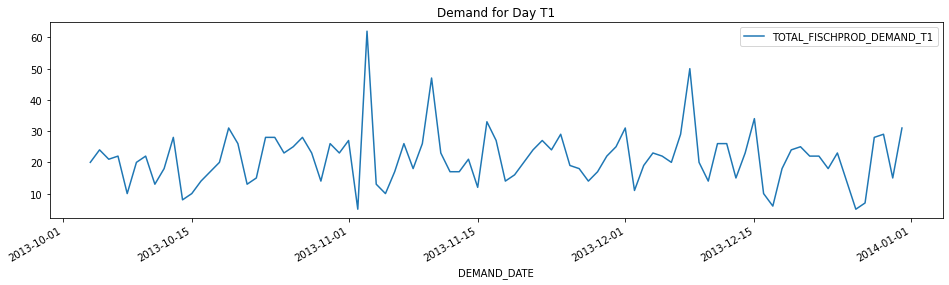

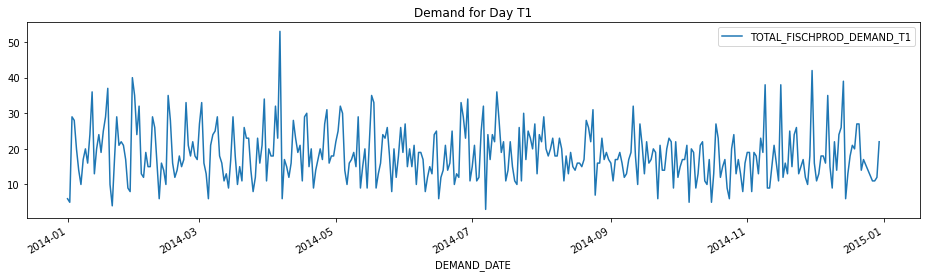

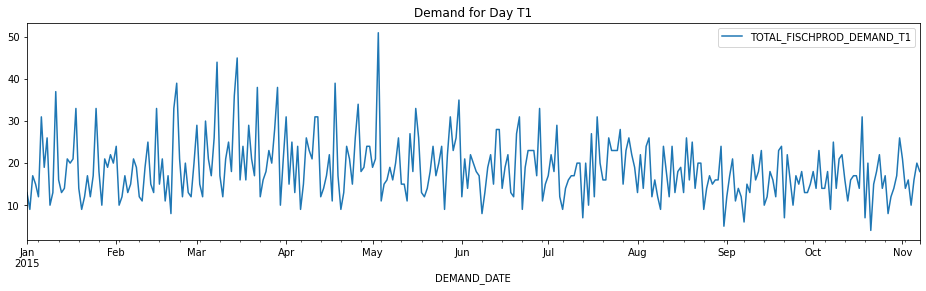

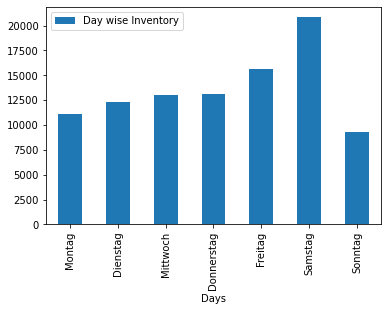

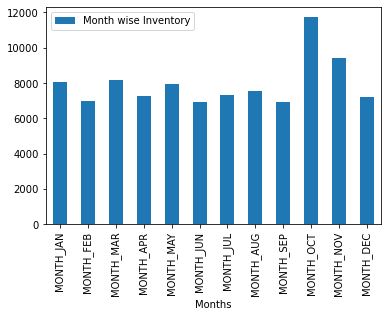

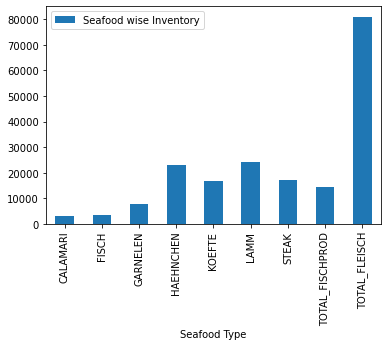

In [1]:
from Inventory_Environment_v1 import Env
import collections
import numpy as np
import random
import pickle
import os

import jproperties
from jproperties import Properties


from datetime import datetime
start_time = datetime.now()


### Create an empty Q-Dictionary if it does not exist:

In [2]:
m=50

In [3]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
7
0


### Import the latest dictionary if Q-Dictionary already exists:

In [4]:
if os.stat('Policy700000Episodes.pkl').st_size != 0:

    with open('Policy700000Episodes.pkl', 'rb') as handle:
        Q_dict = pickle.load(handle)
    
    with open('Rewards700000Episodes.pkl', 'rb') as handle:
        rewards_tracked = pickle.load(handle)    

    with open('States_tracked700000Episodes.pkl', 'rb') as handle:
        States_track = pickle.load(handle)    
    
    print(len(Q_dict))
    print(len(rewards_tracked))
    print(len(States_track))

357
7
7


In [5]:
#function to return valid actions

def valid_actions(state):
    
    state = int(state[0])
    valid_Actions = []
    
    for ix in range(0,m+1):
        valid_Actions.append(ix)
    return valid_Actions

In [6]:
#function to add Q-values to Q-dictionary

def add_to_dict(state,valid_act):
    
    if state not in Q_dict.keys():
        Q_dict[state] = {}
        for action in valid_act:
            Q_dict[state][action] = 0.0

In [7]:
#function to save Q-dictionary as a pickle file

def save_obj(obj, objname ):
    with open(objname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
#function to initialise Q-values
def initialise_tracking_states():
    sample_q_values = [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [9]:
#function to append latest Q-values of the 4 Q-values

def save_tracking_states():
    for st in States_track.keys():
        for action in States_track[st].keys():
            if st in Q_dict and action in Q_dict[st]:
                States_track[st][action].append(Q_dict[st][action])            

In [10]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7700000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action for max q-value of current state
    else:
        action = np.random.choice(np.arange(0,m+1))    #Exploration: randomly chose the action
    
    return action

### Training

In [11]:
#Parameters

# EPISODES = 1
EPISODES = 700000  #700000 Episodes for Convergence Analysis Testing
# STEPS = 1
STEPS = 30                 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 2000       # Q-values: stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

In [12]:
IsStore = "yes"
configs = Properties()
with open('keywords.properties', 'rb') as read_prop:
    configs.load(read_prop)
    
prop_view = configs.items()
for item in prop_view:
    if ((item[0]) == "IsStore"):
        IsStore = item[1].data

In [13]:
def training():
    for episode in range(0,EPISODES):
    
        env = Env()      #creating an instance of the class
        #this initialises the state and parameters to initial value for new episode
        
#         print("env.IsStore: ",env.IsStore)
#         print("IsStore: ",IsStore)
        if(env.IsStore == IsStore):
#             print("===============START====================")
#             print("Entered program after store check.........")
            initial_state = env.state    #tracking reward
            curr_state = env.state       #start is day's evening for action
            #curr_state is state_mon

#             print("DEBUG: curr_state post store check------------->: ",curr_state)
#             print("DEBUG: initial_state post store check---------->: ",initial_state)
            add_to_dict(curr_state,valid_actions(curr_state))

            #reward is not for the immediately next day
            time_step = 0
            reward = None
            curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
                           
#             print("===============NEXT====================")    
#             print("DEBUG: curr_action after getting from random choice------------>: ",curr_action)
                
            next_state = env.initial_step(curr_state, curr_action)   #returned state_tue
            add_to_dict(next_state,valid_actions(next_state))
            
            curr_state = next_state       
            #note that curr_state is always earlier day evening's stock
            
            total_reward = 0
            
#             print("===============NEXT====================")    
#             print("DEBUG: after making next_state as curr_state. next_state obtained from initial_step------------>: ")
            
#             print("DEBUG: time_step----------------->:",time_step)
#             print("DEBUG: STEPS--------------------->:",STEPS)
#             print("DEBUG: next_state----------------->:",next_state)
#             print("DEBUG: curr_state----------------->:",curr_state)
#             print("DEBUG: before loop---------------->:")
            
            while time_step < STEPS:    #episode runs for a few steps

#                 print("===============NEXT====================")
#                 print("===============when time_step is less than STEPS====================")
#                 print("DEBUG: time_step----------------->:",time_step)
#                 print("DEBUG: STEPS----------------->:",STEPS)                
#                 print("DEBUG: curr_action----------------->:",curr_action)
#                 print("DEBUG: curr_state--------------------->:",curr_state)
#                 print("DEBUG: episode--------------------->:",episode)
                
                curr_action = epsilon_greedy(curr_state, episode)
                next_state, reward = env.step(curr_state, curr_action)
                add_to_dict(next_state,valid_actions(next_state))

                #update
                max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #action corresponding to max q-value of next state
                Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 


                curr_state = next_state
                total_reward += reward
                time_step += 1
                
#                 print("===============NEXT====================") 
                   

#                 print("DEBUG: curr_state----------------->:",curr_state)
#                 print("DEBUG: curr_action---------------->:",curr_action)
#                 print("DEBUG: episode-------------------->:",episode)    
#                 print("DEBUG: next_state--------------------->:",next_state)
#                 print("DEBUG: total_reward--------------------->:",total_reward)
#                 print("DEBUG: reward--------------------->:",reward)
#                 print("DEBUG: time_step--------------------->:",time_step)
#                 print("DEBUG: before tracking awards")                
                    

            #TRACKING REWARDS as per threshold levels
            if initial_state in rewards_tracked:
                rewards_tracked[initial_state].append(total_reward)
                save_obj(rewards_tracked,'Rewards700000Episodes')

            if ((episode+1) % threshold) == 0:
                save_obj(rewards_tracked,'Rewards700000Episodes')   

            #TRACKING Q-VALUES
            if (episode == threshold-1):
                initialise_tracking_states()

            if ((episode+1) % threshold) == 0:
                save_tracking_states()
                save_obj(States_track,'States_tracked700000Episodes')   

            #SAVING POLICY
            if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
                save_obj(Q_dict,'PolicyNew')    
    return episode, total_reward

save_obj(rewards_tracked,'Rewards700000Episodes')   
save_obj(States_track,'States_tracked700000Episodes')   
save_obj(Q_dict,'Policy700000Episodes')

In [14]:
# Training
training()

(699999, -1713.8775)

In [15]:
save_obj(rewards_tracked,'Rewards700000Episodes')   
save_obj(States_track,'States_tracked700000Episodes')   
save_obj(Q_dict,'Policy700000Episodes')      

### Checking Values

In [16]:
Q_dict

defaultdict(dict,
            {(18, 3): {0: -516.3503290666491,
              1: -519.2763361661181,
              2: -519.2163104408525,
              3: -518.5079602563201,
              4: -517.2336539545696,
              5: -516.0784820245802,
              6: -515.5764541272633,
              7: -516.2504320357165,
              8: -515.1234857714412,
              9: -514.6178774537984,
              10: -513.9938234004252,
              11: -513.0735056799618,
              12: -513.5359599813548,
              13: -512.2489650640192,
              14: -512.646671938305,
              15: -511.82342410638284,
              16: -510.97127584894764,
              17: -510.7059607045568,
              18: -509.7518510609364,
              19: -509.0591013737133,
              20: -508.5238407475719,
              21: -508.8354976893471,
              22: -507.07489889128885,
              23: -507.26277955413434,
              24: -506.7472190794535,
              25: -506.1724228

In [17]:
States_track

defaultdict(dict,
            {(15,
              0): {12: [-405.4031387869369,
               -405.96061325775645,
               -407.0751168463071,
               -407.25873611908156,
               -407.4467344066238,
               -408.366706672129,
               -408.9118078905474,
               -409.82758309770196,
               -410.37924097871,
               -410.56459854340625,
               -411.29850964872946,
               -412.0299082103455,
               -412.5650978134664,
               -413.0988297603847,
               -413.4564160701692,
               -414.1688347729938,
               -414.52596801631273,
               -415.0612124387091,
               -415.7615545350875,
               -416.1044693799919,
               -416.80187212792384,
               -417.316266471312,
               -418.9707435139216,
               -419.76749804121715,
               -420.0833821612925,
               -420.4049516152249,
               -421.04766534137826,
     

In [18]:
rewards_tracked[(10,5)][-10:]

[-1701.915,
 -1874.955,
 -1875.8374999999999,
 -1922.4650000000001,
 -1727.0300000000002,
 -1502.1225000000002,
 -1709.9275000000002,
 -1881.6124999999995,
 -1724.0124999999998,
 -1725.865]

In [19]:
rewards_tracked[(10,5)][0:10]

[-1704.9299999999996,
 -1665.7,
 -1797.0025000000005,
 -1725.9874999999997,
 -1716.7625000000003,
 -1617.1799999999996,
 -1678.0974999999996,
 -1766.1175,
 -1749.8475000000003,
 -1800.6224999999995]

In [20]:
rewards_tracked

{(15, 0): [-1693.55,
  -1756.11,
  -1754.3750000000002,
  -1584.5850000000003,
  -1523.5125,
  -1840.3224999999998,
  -1576.3825000000002,
  -1905.2700000000004,
  -1746.3050000000003,
  -1916.3024999999996,
  -1801.3474999999999,
  -1562.7450000000003,
  -1788.1625,
  -1645.4275000000002,
  -1918.0649999999998,
  -1835.3574999999996,
  -1774.1774999999998,
  -1578.5849999999998,
  -1717.1175000000005,
  -1729.6474999999996,
  -1935.2625,
  -1928.0399999999997,
  -1870.4174999999998,
  -1955.155,
  -1714.2750000000003,
  -1619.6724999999997,
  -1333.9199999999996,
  -1491.9225,
  -1852.3824999999995,
  -1644.4399999999996,
  -1793.4900000000002,
  -1799.1324999999997,
  -1757.2775,
  -1612.5199999999998,
  -1738.415,
  -1655.5349999999999,
  -1823.3025,
  -1851.315,
  -1952.0399999999997,
  -2099.8924999999995,
  -1748.3725,
  -1734.2350000000004,
  -1668.3375,
  -1637.3925000000002,
  -1788.1974999999998,
  -1779.2549999999999,
  -1777.4975000000002,
  -2030.0800000000006,
  -1679.374

### Memory requirements

In [21]:
#No. of state,action pairs
state_space = 51*51*7
print(state_space)

18207


In [22]:
#4 q-values in tracking and saved as per threshold levels

no_of_q_values_tracked = 4*20000000/20000
print(no_of_q_values_tracked)


4000.0


In [23]:
# testing Q dictionary
Q_dict[(50,2)]

{0: -358.2053664584231,
 1: -360.1778155439652,
 2: -359.46096773680597,
 3: -358.6822618783065,
 4: -357.9931471668957,
 5: -357.2680051601738,
 6: -357.6617965687832,
 7: -356.9877006131872,
 8: -356.78877662598944,
 9: -356.21574993316375,
 10: -354.8894039708535,
 11: -354.54613299565807,
 12: -354.1656011323607,
 13: -353.922334541923,
 14: -352.62725637092217,
 15: -352.6693678940162,
 16: -351.6389580139059,
 17: -351.16516426401023,
 18: -350.0077874927135,
 19: -350.1935242856531,
 20: -349.5408336671095,
 21: -348.9125404526255,
 22: -348.69402188761103,
 23: -348.4898724484729,
 24: -348.0958234780477,
 25: -346.9084320117725,
 26: -346.2220593313702,
 27: -344.91375137050363,
 28: -345.0964312243757,
 29: -345.0758638048333,
 30: -343.7903317981234,
 31: -344.0518869401684,
 32: -342.7483438710696,
 33: -342.71323039892025,
 34: -340.9679944693162,
 35: -341.574505968818,
 36: -340.30354888942526,
 37: -340.5822636240812,
 38: -340.0209615309492,
 39: -339.42758541837276,
 

In [24]:
print("max reward value for this state(50,2) is: ", max(Q_dict[(50,2)]))

max reward value for this state(50,2) is:  50


In [25]:
# determining re-order levels as per inventory size
for x in range(0, 51):
    print(x, ':', max(Q_dict[(x,0)],key=Q_dict[(x,0)].get))

0 : 47
1 : 47
2 : 49
3 : 48
4 : 47
5 : 48
6 : 45
7 : 50
8 : 48
9 : 47
10 : 50
11 : 46
12 : 48
13 : 50
14 : 50
15 : 50
16 : 50
17 : 47
18 : 48
19 : 47
20 : 49
21 : 50
22 : 50
23 : 49
24 : 48
25 : 47
26 : 47
27 : 45
28 : 47
29 : 48
30 : 50
31 : 50
32 : 49
33 : 47
34 : 47
35 : 48
36 : 50
37 : 46
38 : 49
39 : 50
40 : 49
41 : 50
42 : 50
43 : 50
44 : 50
45 : 49
46 : 46
47 : 50
48 : 49
49 : 47
50 : 50


In [26]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:38:18.989609
